In [1]:
from datetime import datetime

from finance_utils.backtest import Backtest
import yfinance as yf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [48]:
from_beginning = '1987-01-01'
# hang seng index start: 1987-01-01
name = 'SPY'

In [49]:
start_date = from_beginning
df = yf.download(name, start=start_date)

[*********************100%%**********************]  1 of 1 completed


In [50]:
today = datetime.now()
last_10_years = f'{today.year - 9}-01-01'
last_20_years = f'{today.year - 19}-01-01'
last_30_years = f'{today.year - 29}-01-01'
start_date = f'1900-01-01'
choices = [last_10_years, last_20_years, last_30_years, start_date]

In [51]:
open_m = df['Open'].groupby([df.index.year, df.index.month]).first()
close_m = df['Close'].groupby([df.index.year, df.index.month]).last()
df_m = pd.DataFrame()
df_m['Open'] = open_m
df_m['Close'] = close_m
df_m.index.names = ['Year', 'Month']
df_m = df_m.reset_index()
df_m.index = [f"{df_m['Year'].iloc[i]}-{df_m['Month'].iloc[i]}-1" for i in range(len(df_m))]
df_m

,Year,Month,Open,Close
1993-1-1,1993,1,43.968750,43.937500
1993-2-1,1993,2,43.968750,44.406250
1993-3-1,1993,3,44.562500,45.187500
1993-4-1,1993,4,45.250000,44.031250
1993-5-1,1993,5,44.093750,45.218750
...,...,...,...,...
2024-4-1,2024,4,523.830017,501.980011
2024-5-1,2024,5,501.380005,527.369995
2024-6-1,2024,6,529.020020,544.219971
2024-7-1,2024,7,545.630005,550.809998


1-2, 3-4, ..., 11-12

In [52]:
def get_x_months_results(_df_, _time, x):
    returns = []
    months = []
    years = []
    _df = _df_[_df_.index >= _time].copy().reset_index()
    
    for i in range(0, _df.shape[0] - (x - 1)):
        res = _df.loc[i + x - 1, 'Close'] / _df.loc[i, 'Open'] - 1
        time = str(_df.loc[i, 'Month']) + '-' + str(_df.loc[i + x - 1, 'Month'])
        
        returns.append(res)
        months.append(time)
        years.append(str(_df.loc[i, 'Year']) + '-' + str(_df.loc[i + x - 1, 'Year']))
    
    df_12 = pd.DataFrame({'Return': returns, 'Months': months, 'Years': years})
    
    table_12 = df_12.groupby('Months')['Return'].describe()
    table_12['mean / std'] = table_12['mean'] / table_12['std']
    table_12['Win Rate %'] = (df_12.groupby('Months')['Return'].apply(lambda y: (y > 0).sum()) 
                              / table_12['count'] * 100)
    table_12 = table_12.reset_index()

    # months = {f'{i + 1}-': i + 1 for i in range(12)}
    months = {(f'{i + 1}-{i + x}' if i + x <= 12 else f'{i + 1}-{i + x - 12}'): i + 1 for i in range(12)}
    
    indexes = [months[m] for m in table_12['Months']]
    table_12.index = indexes
    table_12.index.name = _time if _time != '1900-01-01' else from_beginning
    
    table_12 = table_12.sort_index()
    return table_12

In [53]:
get_x_months_results(df_m, from_beginning, 6)

,Months,count,mean,std,min,25%,50%,75%,max,mean / std,Win Rate %
1987-01-01,,,,,,,,,,,
1,1-6,32.0,0.039649,0.100244,-0.207957,-0.019690,0.043176,0.106739,0.191154,0.395525,68.750000
2,2-7,32.0,0.048714,0.095850,-0.193916,0.000752,0.036270,0.121841,0.211352,0.508228,78.125000
3,3-8,32.0,0.048866,0.112178,-0.178482,-0.033861,0.043853,0.108889,0.412852,0.435609,71.875000
4,4-9,31.0,0.031667,0.138566,-0.283988,-0.037226,0.042395,0.073113,0.350472,0.228533,64.516129
5,5-10,31.0,0.023578,0.101552,-0.300260,-0.007238,0.029214,0.080518,0.184355,0.232175,70.967742
6,6-11,31.0,0.040706,0.107637,-0.355718,-0.008864,0.070365,0.100841,0.192477,0.378178,70.967742
7,7-12,31.0,0.047252,0.105437,-0.286753,-0.001497,0.067071,0.103100,0.219098,0.448154,74.193548
8,8-1,31.0,0.039254,0.103413,-0.348411,-0.001428,0.048179,0.104122,0.222114,0.379589,74.193548
9,9-2,31.0,0.047421,0.132606,-0.431439,0.005428,0.074653,0.120810,0.286272,0.357608,77.419355


In [72]:
x_months = 6

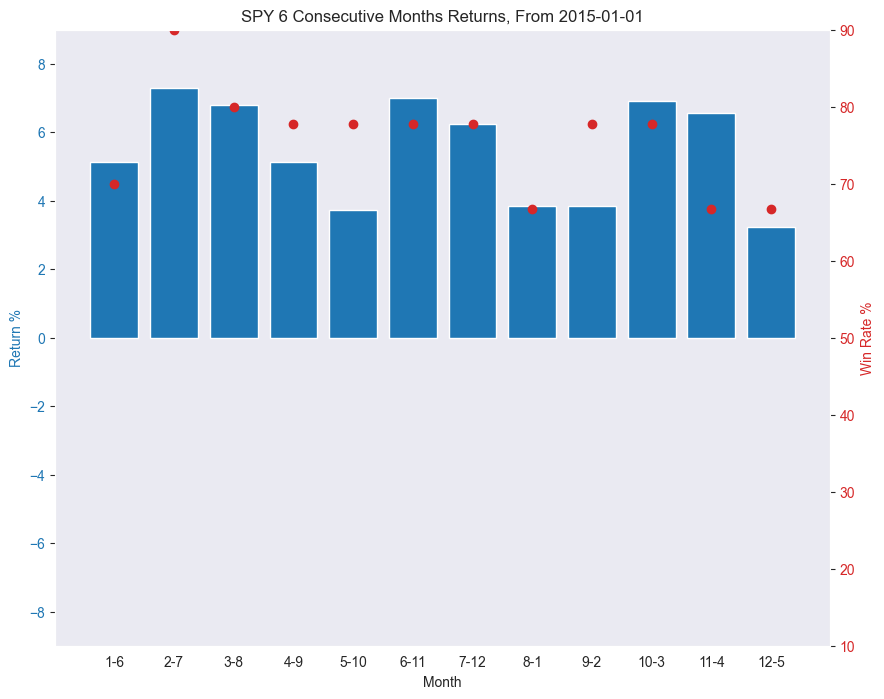

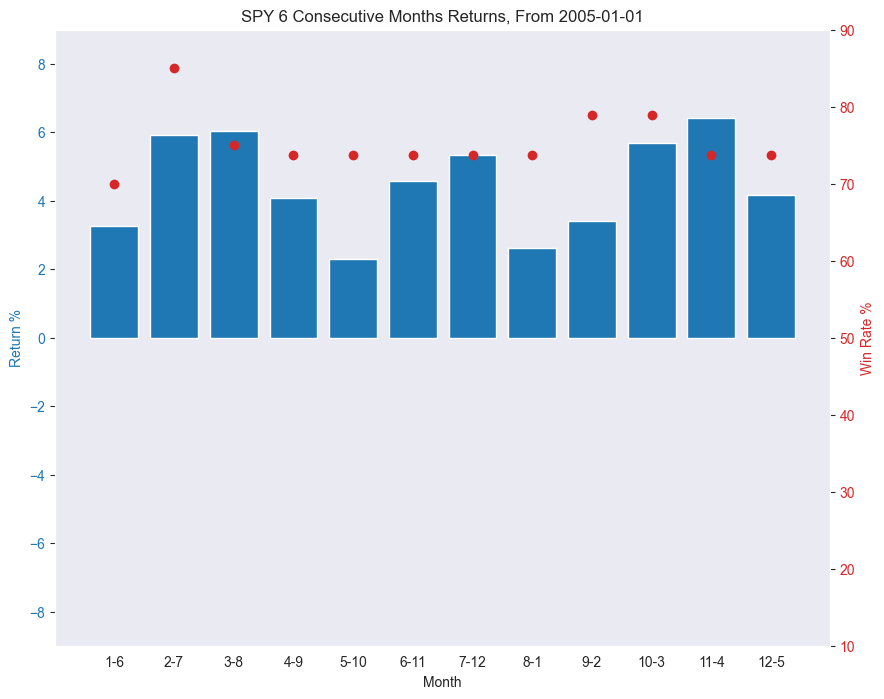

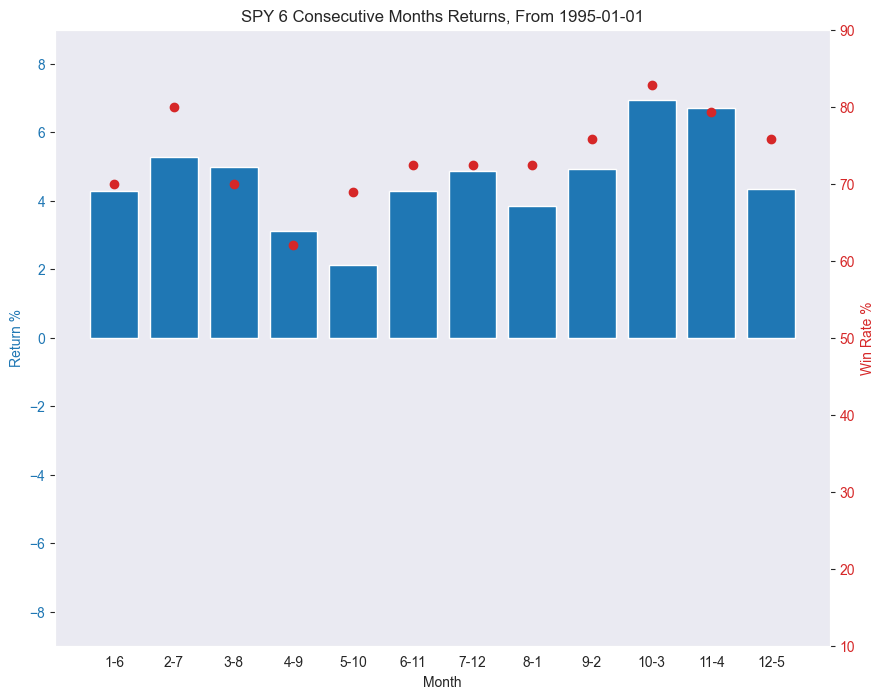

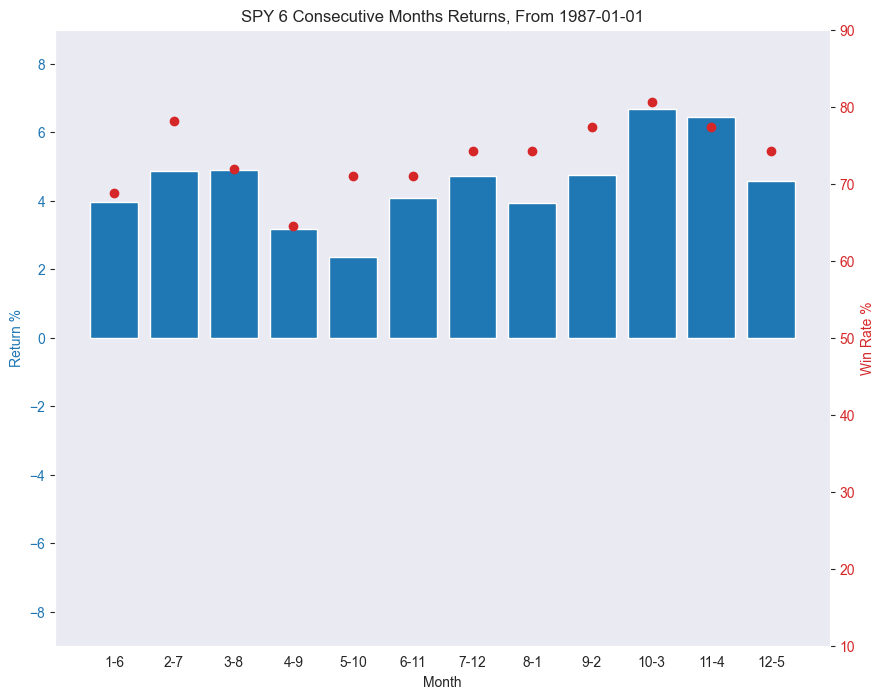

In [73]:
for n, t in enumerate(choices):
    _df = get_x_months_results(df_m, t, x_months)
    
    fig, ax1 = plt.subplots(figsize=(10, 8))
    plt.grid(False)
    color = 'tab:blue'
    ax1.set_xlabel('Month')
    ax1.set_ylabel('Return %', color=color)
    ax1.bar(x=_df['Months'], height=_df['mean'] * 100, color=color)
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.set_ylim(-9, 9)
    
    ax2 = ax1.twinx()  # instantiate a second Axes that shares the same x-axis
    plt.grid(False)
    color = 'tab:red'
    ax2.set_ylabel('Win Rate %', color=color)  # we already handled the x-label with ax1
    ax2.scatter(x=_df['Months'], y=_df['Win Rate %'], color=color)
    ax2.tick_params(axis='y', labelcolor=color)
    ax2.set_ylim(10, 90)

    years = _df.index.name
    plt.title(f'{name} {x_months} Consecutive Months Returns, From {years}')
    plt.savefig(f'/Users/henrywzh/Desktop/{years}.png')
    plt.show()